**Job Market Analysis**

Objective :
Analyze skill demand and salary patterns across major data roles
to identify high-demand and high-paying skills.

In [ ]:
import ast
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datasets import load_dataset


In [ ]:
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

df.head()


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md: 0.00B [00:00, ?B/s]

data_jobs.csv:   0%|          | 0.00/231M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/785741 [00:00<?, ? examples/s]

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,None,NaN,NaN,Boehringer Ingelheim,None,None
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,"['r', 'python', 'sql', 'nosql', 'power bi', 't...","{'analyst_tools': ['power bi', 'tableau'], 'pr..."
2,Data Engineer,"Data Engineer/Scientist/Analyst, Mid or Senior...","Berlin, Germany",via LinkedIn,Full-time,False,Germany,2023-10-10 13:14:55,False,False,Germany,None,NaN,NaN,ALPHA Augmented Services,"['python', 'sql', 'c#', 'azure', 'airflow', 'd...","{'analyst_tools': ['dax'], 'cloud': ['azure'],..."
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,None,NaN,NaN,Southwest Research Institute,"['python', 'c++', 'java', 'matlab', 'aws', 'te...","{'cloud': ['aws'], 'libraries': ['tensorflow',..."
4,Data Engineer,Data Engineer- Sr Jobs,"Washington, DC",via Clearance Jobs,Full-time,False,Sudan,2023-08-07 14:29:36,False,False,Sudan,None,NaN,NaN,Kristina Daniel,"['bash', 'python', 'oracle', 'aws', 'ansible',...","{'cloud': ['oracle', 'aws'], 'other': ['ansibl..."


In [ ]:
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

df['job_skills'] = df['job_skills'].apply(
    lambda x: ast.literal_eval(x) if pd.notna(x) else x
)


In [ ]:
df_US = df[df['job_country'] == 'United States'].copy()
df_US.shape


(206292, 17)

In [ ]:
top_roles = df_US['job_title_short'].value_counts().head(3)
top_roles


,count
job_title_short,
Data Analyst,67816
Data Scientist,58830
Data Engineer,35080


In [ ]:
df_top_roles = df_US[df_US['job_title_short'].isin(top_roles.index)]
df_top_roles.shape


(161726, 17)

In [ ]:
df_skills = df_top_roles.explode('job_skills')
df_skills = df_skills.dropna(subset=['job_skills'])
df_skills.head()


,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,None,NaN,NaN,Southwest Research Institute,python,"{'cloud': ['aws'], 'libraries': ['tensorflow',..."
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,None,NaN,NaN,Southwest Research Institute,c++,"{'cloud': ['aws'], 'libraries': ['tensorflow',..."
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,None,NaN,NaN,Southwest Research Institute,java,"{'cloud': ['aws'], 'libraries': ['tensorflow',..."
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,None,NaN,NaN,Southwest Research Institute,matlab,"{'cloud': ['aws'], 'libraries': ['tensorflow',..."
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,None,NaN,NaN,Southwest Research Institute,aws,"{'cloud': ['aws'], 'libraries': ['tensorflow',..."


In [ ]:
df_skill_count = (
    df_skills
    .groupby(['job_title_short', 'job_skills'])
    .size()
    .reset_index(name='skill_count')
    .sort_values(by='skill_count', ascending=False)
)

df_skill_count.head(10)


,job_title_short,job_skills,skill_count
589,Data Scientist,python,42379
175,Data Analyst,sql,34452
624,Data Scientist,sql,30034
54,Data Analyst,excel,27519
593,Data Scientist,r,26022
397,Data Engineer,sql,23958
362,Data Engineer,python,22762
186,Data Analyst,tableau,19311
141,Data Analyst,python,18382
233,Data Engineer,aws,15018


In [ ]:
df_role_totals = (
    df_top_roles['job_title_short']
    .value_counts()
    .reset_index()
)

df_role_totals.columns = ['job_title_short', 'total_jobs']

df_skill_percent = df_skill_count.merge(df_role_totals, on='job_title_short')

df_skill_percent['skill_percent'] = (
    df_skill_percent['skill_count'] / df_skill_percent['total_jobs']
) * 100

df_skill_percent.head()


,job_title_short,job_skills,skill_count,total_jobs,skill_percent
0,Data Scientist,python,42379,58830,72.036376
1,Data Analyst,sql,34452,67816,50.802171
2,Data Scientist,sql,30034,58830,51.052184
3,Data Analyst,excel,27519,67816,40.578919
4,Data Scientist,r,26022,58830,44.232534


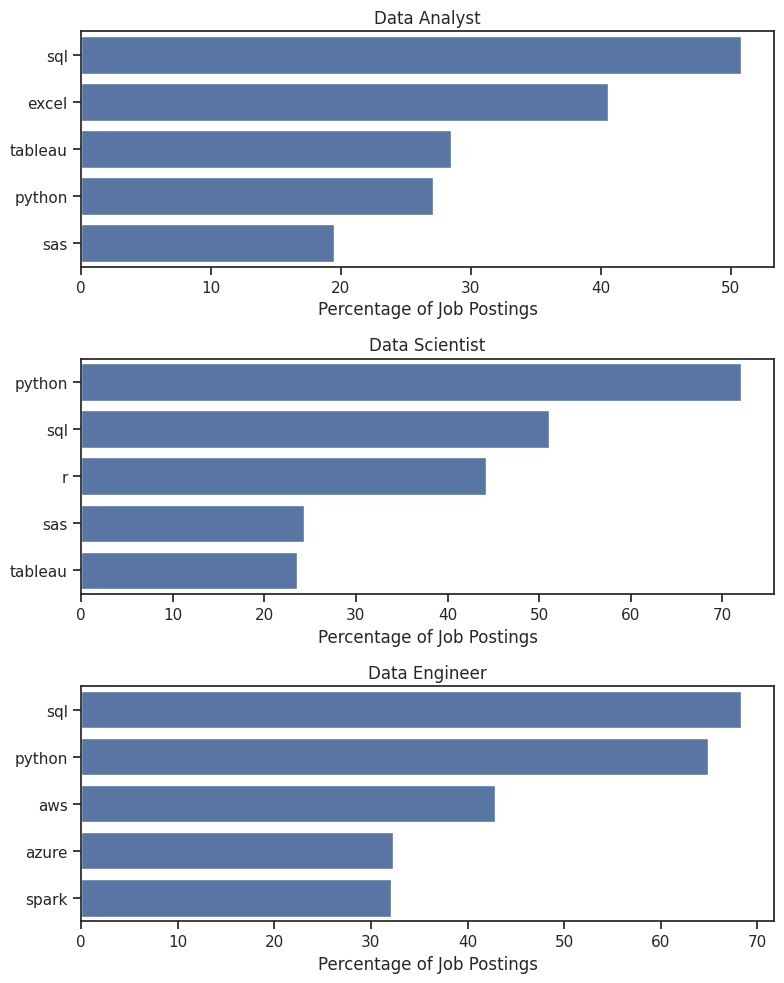

In [ ]:
sns.set_theme(style='ticks')

fig, ax = plt.subplots(len(top_roles), 1, figsize=(8, 10))

for i, role in enumerate(top_roles.index):
    df_plot = (
        df_skill_percent[df_skill_percent['job_title_short'] == role]
        .sort_values(by='skill_percent', ascending=False)
        .head(5)
    )

    sns.barplot(
        data=df_plot,
        x='skill_percent',
        y='job_skills',
        ax=ax[i]
    )

    ax[i].set_title(role)
    ax[i].set_xlabel('Percentage of Job Postings')
    ax[i].set_ylabel('')

plt.tight_layout()
plt.show()


Skill Demand (US Market)

Top 3 Roles:

Data Analyst

Data Scientist

Data Engineer

Key Findings

SQL is required across all three roles.

Python dominates Data Scientist and Data Engineer roles.

Excel & Tableau are more concentrated in Data Analyst positions.

Cloud skills (AWS, Azure, Spark) are mainly required for Data Engineers.

Conclusion:
SQL is the foundational skill. Python is essential for advanced roles. Cloud tools differentiate Data Engineers from other data roles.

Skill Trend Analysis                                                                        
Focus: Data Analyst – United States                                                 
We analyze how in-demand skills for Data Analysts change over time.
The goal is to understand whether certain skills are increasing, stable, or declining in demand.


In [ ]:
df_DA_US = df[
    (df['job_title_short'] == 'Data Analyst') &
    (df['job_country'] == 'United States')
].copy()

df_DA_US['job_posted_month_no'] = df_DA_US['job_posted_date'].dt.month


In [ ]:
df_DA_US_explode = df_DA_US.explode('job_skills')


In [ ]:
df_DA_US_pivot = df_DA_US_explode.pivot_table(
    index='job_posted_month_no',
    columns='job_skills',
    aggfunc='size',
    fill_value=0
)


In [ ]:
df_DA_US_pivot.loc['Total'] = df_DA_US_pivot.sum()

df_DA_US_pivot = df_DA_US_pivot[
    df_DA_US_pivot.loc['Total'].sort_values(ascending=False).index
]

df_DA_US_pivot = df_DA_US_pivot.drop('Total')


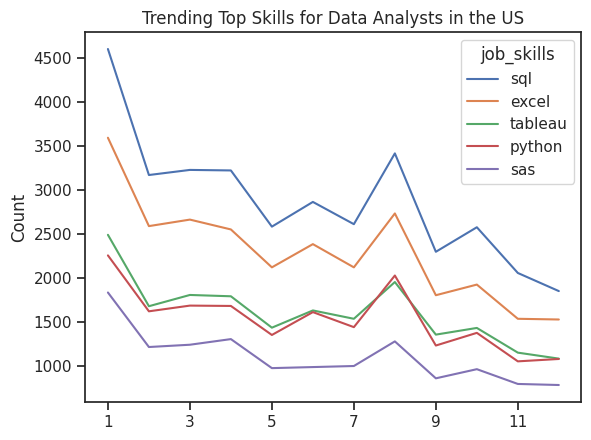

In [ ]:
df_DA_US_pivot.iloc[:, :5].plot(kind='line')

plt.title('Trending Top Skills for Data Analysts in the US')
plt.ylabel('Count')
plt.xlabel('')
plt.show()


In [ ]:
DA_totals = df_DA_US.groupby('job_posted_month_no').size()
df_DA_US_percent = df_DA_US_pivot.div(DA_totals, axis=0) * 100


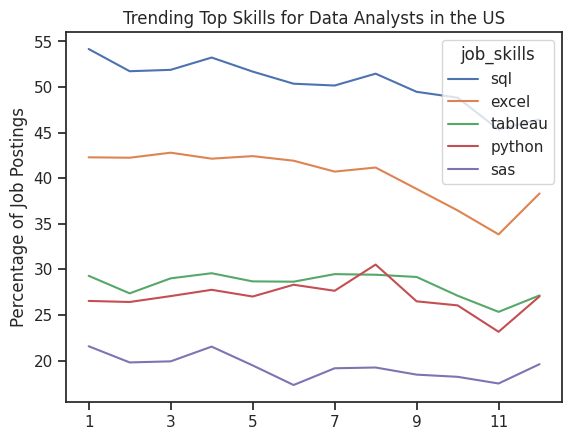

In [ ]:
df_DA_US_percent.iloc[:, :5].plot(kind='line')

plt.title('Trending Top Skills for Data Analysts in the US')
plt.ylabel('Percentage of Job Postings')
plt.xlabel('')
plt.show()


SQL remains consistently the most required skill across all months.

Excel maintains strong demand but shows slight decline toward the end of the year.

Python and Tableau remain stable with moderate fluctuations.

Overall, skill demand for Data Analysts is relatively stable throughout the year.


Salary Analysis                                                                              
Focus: United States Market                                                                                                                                                                                                                                                  In this section, we analyze salary distributions across major data roles
and identify which skills are associated with higher median salaries.

In [ ]:
df_US_salary = df[
    (df['job_country'] == 'United States') &
    (df['salary_year_avg'].notna())
].copy()


In [ ]:
top_roles_salary = df_US_salary['job_title_short'].value_counts().index[:6].tolist()

df_US_top6 = df_US_salary[
    df_US_salary['job_title_short'].isin(top_roles_salary)
]


In [ ]:
top_roles_salary = df_US_salary['job_title_short'].value_counts().index[:6].tolist()

df_US_top6 = df_US_salary[
    df_US_salary['job_title_short'].isin(top_roles_salary)
]


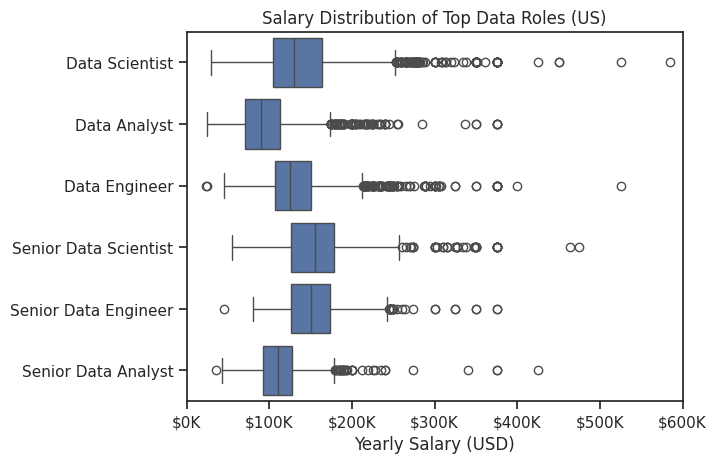

In [ ]:
job_order = top_roles_salary
sns.boxplot(
    data=df_US_top6,
    x='salary_year_avg',
    y='job_title_short',
    order=job_order
)

plt.title('Salary Distribution of Top Data Roles (US)')
plt.xlabel('Yearly Salary (USD)')
plt.ylabel('')
plt.xlim(0, 600000)

plt.gca().xaxis.set_major_formatter(
    plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K')
)

plt.show()

Senior Data Scientist and Senior Data Engineer roles have the highest median salaries.

Data Scientist and Data Engineer roles earn significantly more than Data Analyst roles.

Salary distributions show wide variability, especially for Data Scientist positions.


In [ ]:
df_DA_US = df[
    (df['job_title_short'] == 'Data Analyst') &
    (df['job_country'] == 'United States') &
    (df['salary_year_avg'].notna())
].copy()


In [ ]:
df_DA_US = df_DA_US.explode('job_skills')
df_DA_skills = (
    df_DA_US
    .groupby('job_skills')['salary_year_avg']
    .agg(['count', 'median'])
    .sort_values(by='count', ascending=False)
)


In [ ]:
df_DA_top_demand = df_DA_skills.head(10).sort_values(by='median', ascending=False)
df_DA_top_demand
df_DA_skills_filtered = df_DA_skills[df_DA_skills['count'] > 50]

df_DA_top_pay = (
    df_DA_skills_filtered
    .sort_values(by='median', ascending=False)
    .head(10)
)

df_DA_top_pay



,count,median
job_skills,,
hadoop,97,112690.00
snowflake,195,110000.00
express,74,110000.00
databricks,62,110000.00
alteryx,106,106281.25
spark,94,105550.00
jira,116,104802.50
looker,166,102500.00
azure,207,100000.00


Higher-paying Data Analyst roles are associated with big data and cloud technologies such as Hadoop, Snowflake, Databricks, and Spark.

Cloud platforms like AWS and Azure also show strong salary impact.

Advanced technical skills significantly increase earning potential compared to traditional analyst tools.


In [ ]:
DA_job_count = len(df_DA_US)

df_DA_skills['skill_percent'] = (
    df_DA_skills['count'] / DA_job_count * 100
)
skill_limit = 5

df_DA_skills_high_demand = df_DA_skills[
    df_DA_skills['skill_percent'] > skill_limit
]


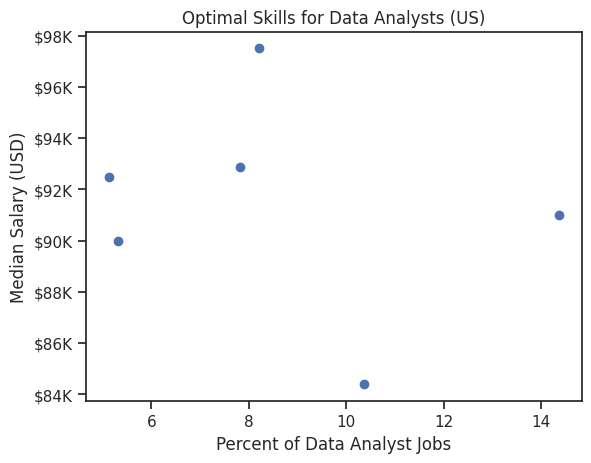

In [ ]:
plt.scatter(
    df_DA_skills_high_demand['skill_percent'],
    df_DA_skills_high_demand['median']
)

plt.xlabel('Percent of Data Analyst Jobs')
plt.ylabel('Median Salary (USD)')
plt.title('Optimal Skills for Data Analysts (US)')

plt.gca().yaxis.set_major_formatter(
    plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K')
)

plt.show()


Python provides the best balance between demand and salary for Data Analysts.

SQL has the highest demand but slightly lower median salary.

Advanced analytical and programming skills lead to stronger earning potential compared to traditional tools like Excel.
